<a href="https://colab.research.google.com/github/milicak/Data_Analysis_Course/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import random
import matplotlib.pyplot as plt
!pip install netCDF4

In [47]:
import xarray as xr

In [48]:
url = 'https://data.giss.nasa.gov/pub/gistemp/gistemp1200_GHCNv4_ERSSTv5.nc.gz'
#The dataset is small enough (23 MB) that it is sufficient to make local copy of the file.
!wget -nc {url}
ds1 = xr.open_dataset('gistemp1200_GHCNv4_ERSSTv5.nc.gz')
ds1

File ‘gistemp1200_GHCNv4_ERSSTv5.nc.gz’ already there; not retrieving.



<xarray.Dataset> Size: 113MB
Dimensions:      (lat: 90, lon: 180, time: 1742, nv: 2)
Coordinates:
  * lat          (lat) float32 360B -89.0 -87.0 -85.0 -83.0 ... 85.0 87.0 89.0
  * lon          (lon) float32 720B -179.0 -177.0 -175.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 14kB 1880-01-15 1880-02-15 ... 2025-02-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] 28kB ...
    tempanomaly  (time, lat, lon) float32 113MB ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2025-03-09 01:09:42 by SBBX_to_nc 2.0 - ILAND=1200,...

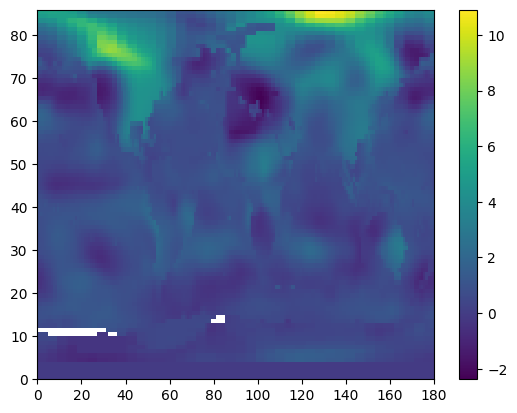

In [ ]:
plt.pcolormesh(ds1.tempanomaly[-12,:86,:]);plt.colorbar()

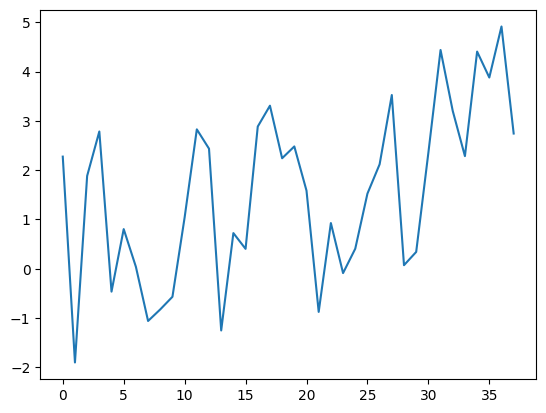

In [49]:
ds1 = ds1.sel(time=slice('1980-01-01','2017-12-31'))
T2Arctic = ds1.tempanomaly[:,80:,60:120].mean(('lat','lon'))
plt.plot(T2Arctic[2::12])

In [ ]:
url = 'https://noaadata.apps.nsidc.org/NOAA/G10010_V2/G10010_SIBT1850_V2.zip'
#The dataset is small enough (23 MB) that it is sufficient to make local copy of the file.
!wget -nc {url}

--2025-03-19 13:22:17--  https://noaadata.apps.nsidc.org/NOAA/G10010_V2/G10010_SIBT1850_V2.zip
Resolving noaadata.apps.nsidc.org (noaadata.apps.nsidc.org)... 128.138.135.43
Connecting to noaadata.apps.nsidc.org (noaadata.apps.nsidc.org)|128.138.135.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73423892 (70M) [application/zip]
Saving to: ‘G10010_SIBT1850_V2.zip’

G10010_SIBT1850_V2. 100%[===================>]  70.02M  20.6MB/s    in 4.0s    

2025-03-19 13:22:22 (17.6 MB/s) - ‘G10010_SIBT1850_V2.zip’ saved [73423892/73423892]



In [ ]:
!unzip G10010_SIBT1850_V2.zip

Archive:  G10010_SIBT1850_V2.zip
  inflating: G10010_sibt1850_v2.0.nc  
  inflating: legend_for_sibt1850_source_v2_pano.cpt.png  
   creating: sibt1850_browse/
  inflating: sibt1850_browse/sibt_ext_ease2_185001.png  
  inflating: sibt1850_browse/sibt_ext_ease2_185002.png  
  inflating: sibt1850_browse/sibt_ext_ease2_185003.png  
  inflating: sibt1850_browse/sibt_ext_ease2_185004.png  
  inflating: sibt1850_browse/sibt_ext_ease2_185005.png  
  inflating: sibt1850_browse/sibt_ext_ease2_185006.png  
  inflating: sibt1850_browse/sibt_ext_ease2_185007.png  
  inflating: sibt1850_browse/sibt_ext_ease2_185008.png  
  inflating: sibt1850_browse/sibt_ext_ease2_185009.png  
  inflating: sibt1850_browse/sibt_ext_ease2_185010.png  
  inflating: sibt1850_browse/sibt_ext_ease2_185011.png  
  inflating: sibt1850_browse/sibt_ext_ease2_185012.png  
  inflating: sibt1850_browse/sibt_ext_ease2_185101.png  
  inflating: sibt1850_browse/sibt_ext_ease2_185102.png  
  inflating: sibt1850_browse/sibt_ext_ease

NameError: name 'ls' is not defined

In [50]:
ls

G10010_sibt1850_v2.0.nc                     sample_data/                 sibt_areas_v2.csv
G10010_SIBT1850_V2.zip                      sibt1850_browse/             sibt_extents_v2.csv
gistemp1200_GHCNv4_ERSSTv5.nc.gz            sibt1850_conc_v2_to120.cpt   source_montages/
legend_for_sibt1850_source_v2_pano.cpt.png  sibt1850_source_v2_pano.cpt


In [64]:
ds = xr.open_dataset('G10010_sibt1850_v2.0.nc')
ds = ds.sel(time=slice('1980-01-01','2017-12-31'))
aice = ds.seaice_conc.where(ds.seaice_conc!=120)/100
aice = aice*ds.Gridcell_Area
aice = aice.sum(('longitude','latitude'))
aice = aice*1e-6

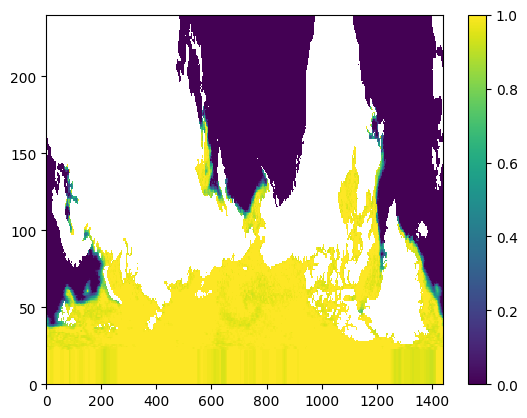

In [63]:
plt.pcolormesh(aice[0,:,:]);plt.colorbar()

ValueError: x and y must have same first dimension, but have shapes (38,) and (101,)

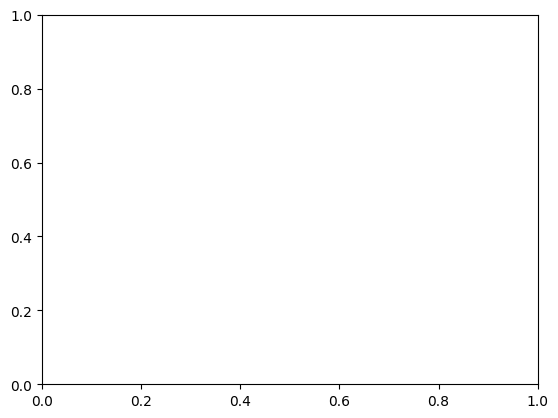

In [75]:
# plot march
time = np.arange(1980,2018)
X = aice[8::12]
plt.plot(time,X,'-*')

Text(0, 0.5, 'March sea ice extent')

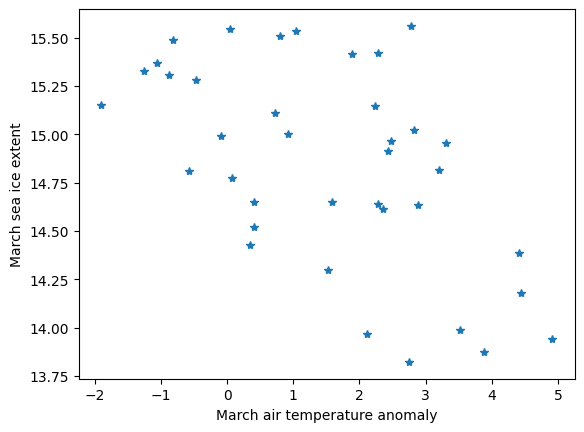

In [66]:
# plot March sea ice extent vs March air temperature anomaly
y = aice[2::12]
X = T2Arctic[2::12]
plt.plot(X,y,'*')
plt.xlabel('March air temperature anomaly')
plt.ylabel('March sea ice extent')

In [67]:
import scipy.stats as st                                    # statistical methods
from sklearn.linear_model import LinearRegression           # scikit-learning multilinear regression
linear = st.linregress(X,y) # output is the linear regression model
print('\nOutput from linregress function is ' + str(type(linear)) + ':')
print(linear)
print('\nLinear Regression Model:')
print('  Slope: ' + str(round(linear.slope,2)))
print('  Intercept: ' + str(round(linear.intercept,2)))
print('  Square Root of R-squared: ' + str(round(linear.rvalue,2)))
print('  Slope p-value: ' + str(round(linear.pvalue,2)))
print('  Slope standard error: ' + str(round(linear.stderr,2)))


Output from linregress function is <class 'scipy.stats._stats_py.LinregressResult'>:
LinregressResult(slope=np.float64(-0.16571584890891497), intercept=np.float64(15.094194086000646), rvalue=np.float64(-0.557019560505807), pvalue=np.float64(0.0002808858052462427), stderr=np.float64(0.041179555871713285), intercept_stderr=np.float64(0.09478402396073218))

Linear Regression Model:
  Slope: -0.17
  Intercept: 15.09
  Square Root of R-squared: -0.56
  Slope p-value: 0.0
  Slope standard error: 0.04


The model parameters are, slope (b1) = -0.17, and the intercept (b0) = 15.09


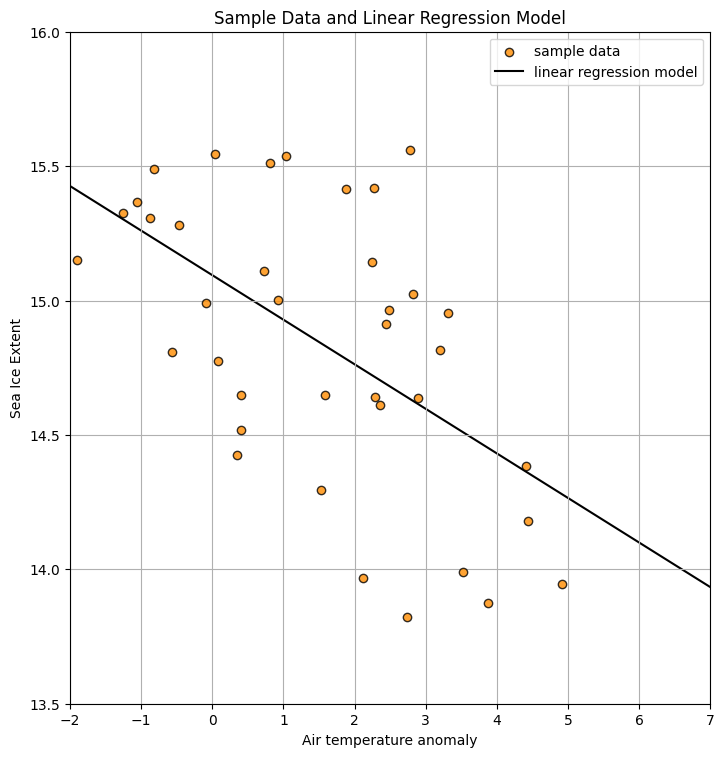

In [68]:
# Visualize the Linear Regression Model
# Now let's visualize the linear regression model with the data.
ymin = 13.5; ymax = 16
xmin = -2; xmax = 7
dX = np.linspace(xmin,xmax,100)                              # a 1D array of 100 density values for calculation and plotting
print('The model parameters are, slope (b1) = ' + str(round(linear.slope,2)) + ', and the intercept (b0) = ' + str(round(linear.intercept,2)))
plt.scatter(X, y, color = 'darkorange',edgecolor='black',alpha=0.8,label='sample data',zorder=10)
plt.plot(dX, linear.intercept + linear.slope*dX, 'black', label='linear regression model',zorder=1)
plt.title('Sample Data and Linear Regression Model'); plt.xlabel('Air temperature anomaly'); plt.ylabel('Sea Ice Extent')
plt.legend(); plt.grid(); plt.ylim([ymin,ymax]); plt.xlim([xmin,xmax])
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.4, wspace=0.1, hspace=0.2); plt.show()

The model parameters confidence intervals at a 0.95 significance level are:
Slope: P2.5 = -0.25 , P97.5 = -0.08


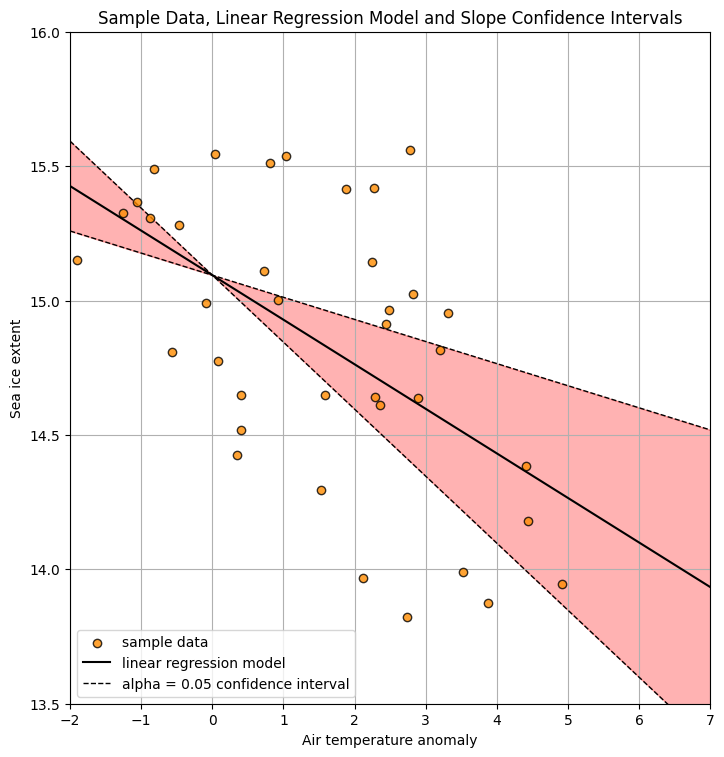

In [69]:
alpha = 0.05
tstat = st.t.ppf([alpha/2,1-alpha/2], len(X)-2)            # calculate t-stat for confidence interval
slope_lower,slope_upper = linear.slope + tstat*linear.stderr # calculate the lower and upper confidence interval for b1
#intercept_lower,intercept_upper = linear.intercept + tstat*linear.intercept_stderr # "" for b0

print('The model parameters confidence intervals at a ' + str(1-alpha) + ' significance level are:')
print('Slope: P' + str(alpha/2*100) + ' = '+ str(round(slope_lower,2)) + ' , P' + str((1-alpha/2)*100) + ' = ' + str(round(slope_upper,2)))
#print('Intercept: ' + str(round(intercept_lower,2)) + ' , ' + str(round(intercept_upper,2)))

plt.scatter(X, y, color = 'darkorange',edgecolor='black',alpha=0.8,label='sample data',zorder=10)
plt.plot(dX, linear.intercept + linear.slope*dX, 'black', label='linear regression model')
plt.plot(dX, linear.intercept + slope_upper*dX, 'black',ls='--',lw=1,label=r'alpha = ' + str(alpha) + ' confidence interval')
plt.plot(dX, linear.intercept + slope_lower*dX, 'black',ls='--',lw=1)
plt.fill_between(dX,linear.intercept + slope_upper*dX,linear.intercept + slope_lower*dX,color='red',alpha=0.3,zorder=1)
plt.title('Sample Data, Linear Regression Model and Slope Confidence Intervals'); plt.xlabel(r'Air temperature anomaly'); plt.ylabel('Sea ice extent')
plt.legend(loc='lower left'); plt.grid(); plt.ylim([ymin,ymax]); plt.xlim([xmin,xmax])
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.4, wspace=0.1, hspace=0.2); plt.show()

In [ ]:
linear.slope, linear.intercept

(np.float64(-0.016571594947779992), np.float64(9.454498178329228))

In [ ]:
b1 = sum(np.copy(X-X.mean())*np.copy(y-y.mean()))/sum(np.copy(X-X.mean())**2)

In [ ]:
b0 = y.mean() - b1*X.mean()
b1, b0

(np.float64(-0.0165715949477905),
 <xarray.DataArray ()> Size: 8B
 array(9.45449627))

In [ ]:
np.corrcoef(X,y)

array([[ 1.        , -0.55701862],
       [-0.55701862,  1.        ]])

In [53]:
from google.colab import files


uploaded = files.upload()


Saving data.csv to data (1).csv


In [54]:
import pandas as pd
df = pd.read_csv('data (1).csv')
df

,Year,Anomaly
0,1850,-0.17
1,1851,-0.03
2,1852,-0.20
3,1853,-0.21
4,1854,-0.15
...,...,...
171,2021,0.65
172,2022,0.90
173,2023,1.02
174,2024,1.41


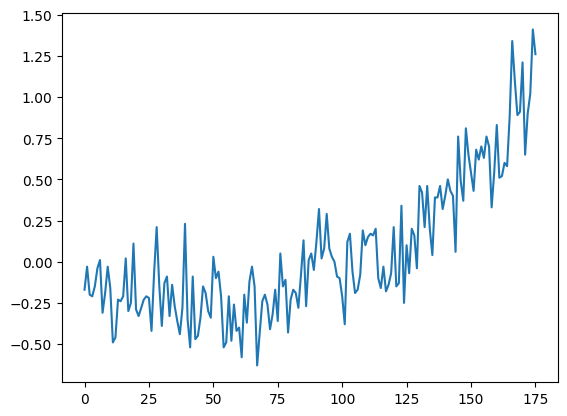

In [70]:
plt.plot(df['Anomaly'])

In [71]:
ds = xr.open_dataset('G10010_sibt1850_v2.0.nc')
ds = ds.sel(time=slice('1850-01-01','1950-12-31'))
aice = ds.seaice_conc.where(ds.seaice_conc!=120)/100
aice = aice*ds.Gridcell_Area
aice = aice.sum(('longitude','latitude'))
aice = aice*1e-6

Text(0, 0.5, 'March sea ice extent')

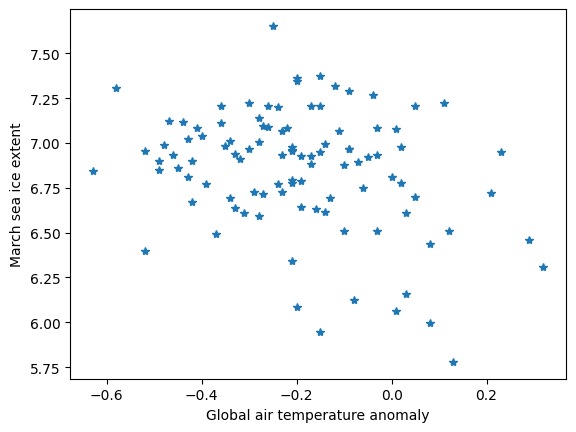

In [73]:
y = aice[8::12]
X = df['Anomaly'][0:101]
plt.plot(X,y,'*')
plt.xlabel('Global air temperature anomaly')
plt.ylabel('March sea ice extent')

The model parameters are, slope (b1) = -0.52, and the intercept (b0) = 6.75


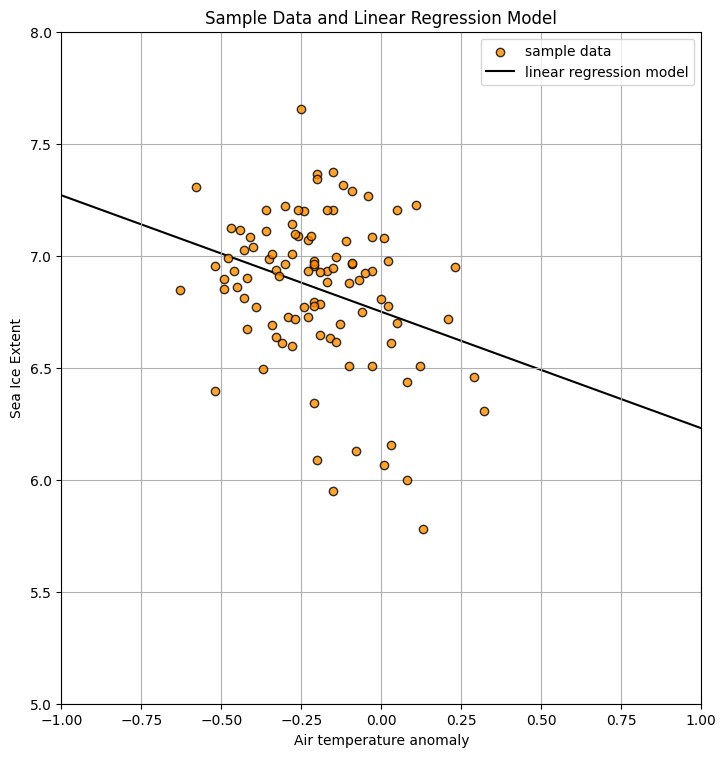

In [74]:
linear = st.linregress(X,y) # output is the linear regression model
# Visualize the Linear Regression Model
# Now let's visualize the linear regression model with the data.
ymin = 5; ymax = 8
xmin = -1; xmax = 1
dX = np.linspace(xmin,xmax,100)                              # a 1D array of 100 density values for calculation and plotting
print('The model parameters are, slope (b1) = ' + str(round(linear.slope,2)) + ', and the intercept (b0) = ' + str(round(linear.intercept,2)))
plt.scatter(X, y, color = 'darkorange',edgecolor='black',alpha=0.8,label='sample data',zorder=10)
plt.plot(dX, linear.intercept + linear.slope*dX, 'black', label='linear regression model',zorder=1)
plt.title('Sample Data and Linear Regression Model'); plt.xlabel('Air temperature anomaly'); plt.ylabel('Sea Ice Extent')
plt.legend(); plt.grid(); plt.ylim([ymin,ymax]); plt.xlim([xmin,xmax])
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.4, wspace=0.1, hspace=0.2); plt.show()

In [76]:
ds

<xarray.Dataset> Size: 838MB
Dimensions:          (latitude: 240, longitude: 1440, time: 1212)
Coordinates:
  * latitude         (latitude) float32 960B 89.88 89.62 89.38 ... 30.38 30.12
  * longitude        (longitude) float32 6kB 0.125 0.375 0.625 ... 359.6 359.9
  * time             (time) object 10kB 1850-01-15 00:00:00 ... 1950-12-15 00...
Data variables:
    seaice_conc      (time, latitude, longitude) uint8 419MB 99 99 ... 120 120
    seaice_source    (time, latitude, longitude) uint8 419MB ...
    LandRegion_mask  (latitude, longitude) uint8 346kB ...
    Gridcell_Area    (latitude) float32 960B ...
Attributes:
    version:       2.0
    release_date:  February 28, 2019
    Conventions:   CF-1.4
    citation:      https://doi.org/10.1111/j.1931-0846.2016.12195.x
    dataset_doi:   https://nsidc.org/data/g10010

In [78]:
ds = xr.open_dataset('G10010_sibt1850_v2.0.nc')
ds = ds.sel(time=slice('1960-01-01','2017-12-31'))
aice = ds.seaice_conc.where(ds.seaice_conc!=120)/100
aice = aice*ds.Gridcell_Area
aice = aice.sum(('longitude','latitude'))
aice = aice*1e-6

In [82]:
df['Year'][167]

np.int64(2017)

Text(0, 0.5, 'March sea ice extent')

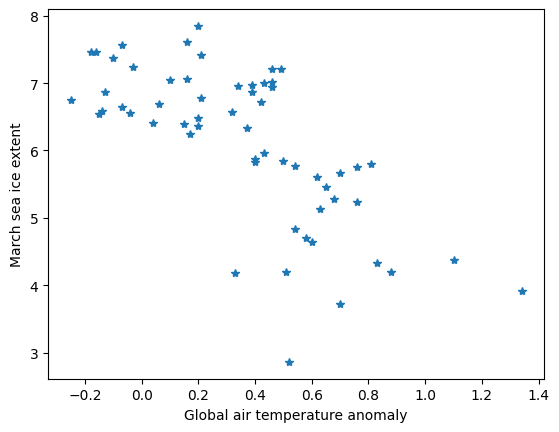

In [83]:
y = aice[8::12]
X = df['Anomaly'][110:168]
plt.plot(X,y,'*')
plt.xlabel('Global air temperature anomaly')
plt.ylabel('March sea ice extent')

The model parameters are, slope (b1) = -2.37, and the intercept (b0) = 6.96


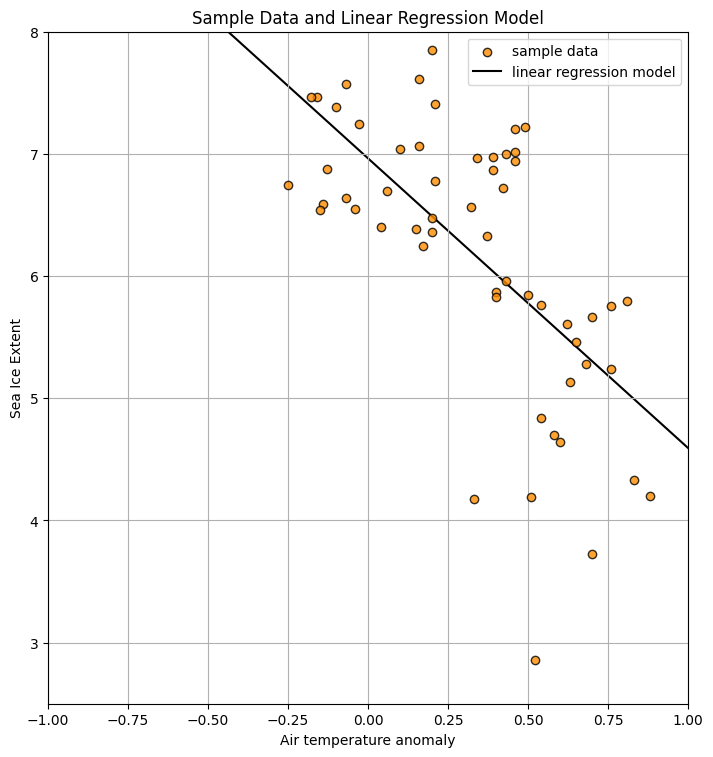

In [84]:
linear = st.linregress(X,y) # output is the linear regression model
# Visualize the Linear Regression Model
# Now let's visualize the linear regression model with the data.
ymin = 2.5; ymax = 8
xmin = -1; xmax = 1
dX = np.linspace(xmin,xmax,100)                              # a 1D array of 100 density values for calculation and plotting
print('The model parameters are, slope (b1) = ' + str(round(linear.slope,2)) + ', and the intercept (b0) = ' + str(round(linear.intercept,2)))
plt.scatter(X, y, color = 'darkorange',edgecolor='black',alpha=0.8,label='sample data',zorder=10)
plt.plot(dX, linear.intercept + linear.slope*dX, 'black', label='linear regression model',zorder=1)
plt.title('Sample Data and Linear Regression Model'); plt.xlabel('Air temperature anomaly'); plt.ylabel('Sea Ice Extent')
plt.legend(); plt.grid(); plt.ylim([ymin,ymax]); plt.xlim([xmin,xmax])
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.4, wspace=0.1, hspace=0.2); plt.show()

In [85]:
np.corrcoef(X,y)

array([[ 1.        , -0.69432978],
       [-0.69432978,  1.        ]])

In [86]:
1,linear.intercept + linear.slope*1

(1, np.float64(4.5923383381548994))

In [87]:
linear.rvalue

np.float64(-0.694329775326078)